<a href="https://colab.research.google.com/github/MouadEttali/From-scratch-machine-learning---From-mathematical-formulas-to-functioning-algorithms/blob/main/Simple_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The purpose of this notebook is to impliment a simple Linear regression from scratch i.e from the basic mathematical notions to a functioning bit of code that is equivalent to calling the LinearRegressor function from scikit-learn

**Loading the data**

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**A scatter plot to visualize the Linear relationship between the population 
and total bedrooms**

Text(0, 0.5, 'bedrooms')

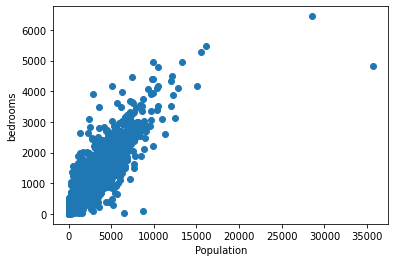

In [4]:
import matplotlib.pyplot as plt

population = df['population']   # creating pandas series variables to hold the data we're interested in without changing the original DataFrame 
bedrooms = df['total_bedrooms']
# Visualization
plt.scatter(population, bedrooms)
plt.xlabel('Population')
plt.ylabel('bedrooms')

In [5]:
population_np = population.to_numpy()  # converting to numpy arrays so we can later on feed into our model 
bedrooms_np = bedrooms.to_numpy()

population_np.shape , bedrooms_np.shape

((17000,), (17000,))

# Let's start by using the integrated Linear Regression that comes with the scikit learn machine learning library 
**Fitting and predicting the number of bedrooms based on the population** 


In [6]:
from sklearn.linear_model import LinearRegression as LR
LR_model = LR().fit(population_np.reshape(17000,1),bedrooms_np)
sklearn_predictions = LR_model.predict(population_np.reshape(17000,1))
sklearn_predictions.shape

(17000,)

Text(0, 0.5, 'bedrooms')

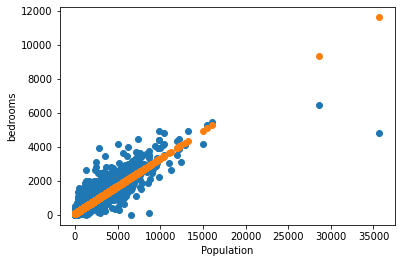

In [7]:
# Visualizing the predicted values on top of the data
plt.scatter(population, bedrooms)
plt.scatter(population,sklearn_predictions)
plt.xlabel('Population')
plt.ylabel('bedrooms')

**let's now create a new DataFrame which we'll use later as a comparaison tool against the model we will create ourselve**

In [8]:
predictions_df = pd.DataFrame({'Population': population,'Bedrooms': bedrooms,'sklearn_predictions':sklearn_predictions})
predictions_df

,Population,Bedrooms,sklearn_predictions
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359
...,...,...,...
16995,907.0,394.0,370.320987
16996,1194.0,528.0,463.185899
16997,1244.0,531.0,479.364455
16998,1298.0,552.0,496.837296


# Now we'll begin to create our new model based on the mathematical formulas and estimations for the linear Regression algorithm .

**First the basics and the functions we'll need to implement the linear Regression**

In [9]:
# Linearity assumes that total_bedrooms[i] = alpha + (beta * population[i]) + error 
# generally  y[i] = alpha + ( beta * x[i]) + error 

def get_predictions(model, x):
  '''
  Obtain the predictions of the given model and inputs.

  model : {'alpha_hat': Number , 'beta_hat':Number}
  x: np.array of floats with shape(n,) of inputs

  Returns : no.array of floats with shape(n,).
   '''
  alpha_hat = model['alpha_hat']
  beta_hat = model['beta_hat']

  return alpha_hat + beta_hat * x

**Let's test some random parameters as values for alpha and beta and visualize the outputs.**

In [10]:
#testing get_predictions

test_model = {'alpha_hat':2,'beta_hat':3}
test_x = np.array([1,4,3])
get_predictions(test_model,test_x)

array([ 5, 14, 11])

Text(0, 0.5, 'bedrooms')

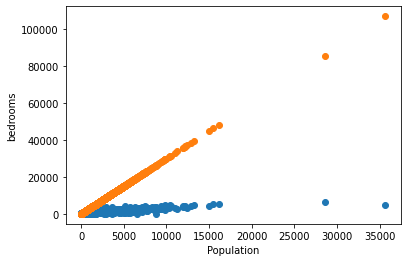

In [11]:
#Visualization
plt.scatter(population,bedrooms)
plt.scatter(population, get_predictions(test_model,population_np))
plt.xlabel('Population')
plt.ylabel('bedrooms')

**It's clear that the parametres alpha and beta we chose are not the most optimal to minimze the error so we'll move on to how to:**

1.   Evaluate our error
2.   Estimate the most optimal alpha and beta for a minimal error



In [12]:
def mean_squared_error(y,y_predictions):
  '''Returns the mean squared error given the observd and the prediction outputs.
  
  y:np.array of floats with shape(n,) of observed outputs.
  y_predictions :  np.array of floats with shape (n,) of predicted outputs.

  returns float representing the MSE
  '''
  n = len(y)
  return np.sum(np.square(y-y_predictions))/n

def mean_absolute_error(y, y_predictions):
  '''Returns the mean absolute error given the observd and the prediction outputs.
  
  y:np.array of floats with shape(n,) of observed outputs.
  y_predictions :  np.array of floats with shape (n,) of predicted outputs.

  returns float representing the MSE
  '''
  n = len(y)
  return np.sum(np.abs(y-y_predictions))/n

In [13]:
mse1 = mean_squared_error(get_predictions(test_model,population_np),bedrooms)
mse1

23549577.56382353

In [14]:
mae1 = mean_absolute_error(get_predictions(test_model,population_np),bedrooms)
mae1

3751.581705882353

**We can see how huge the error is for the arbitrary alpha and beta values are let's move on now to the second part:**

**These next formulas are how alpha and beta are calculated, let's implement them in our code**

$\hat{\beta} = \frac{\sum_{i=1}^{n}(xi-\overline{x})(yi-\overline{y})}{\sum_{i=1}^{n}(xi-\overline{x})^2} $  , $\hat{\alpha} = \overline{y} - \hat{\beta} \overline{x}  $  

In [15]:
def get_best_model(x,y):
  '''
  Returns the model with the parameters that minimize the MSE
  
  x:np.array of floats with shape (n,) of inputs
  y:np.array of floats with shape (n,) of outputs
  
  return : {'alpha_hat':Float , 'beta_hat':Float } representing the model.
  '''

  x_bar = np.average(x)
  y_bar = np.average(y)

  top = np.sum((x-x_bar)*(y-y_bar))
  bot = np.sum((x-x_bar)**2)
  beta_hat  = top/bot
  alpha_hat = y_bar - beta_hat*x_bar

  return {'alpha_hat':alpha_hat,'beta_hat': beta_hat}

In [16]:
best_model = get_best_model(population_np,bedrooms_np)
best_model

{'alpha_hat': 76.84197820308827, 'beta_hat': 0.32357112283793565}

In [41]:
# we can see that we've gotten a much lower mean absolute error ( from 3700 to 118 ) which is quite satisfactory
mae2 = mean_absolute_error(predictions_df['Bedrooms'],predictions_df['our_model_predictions'])
mae2

118.46978339085754

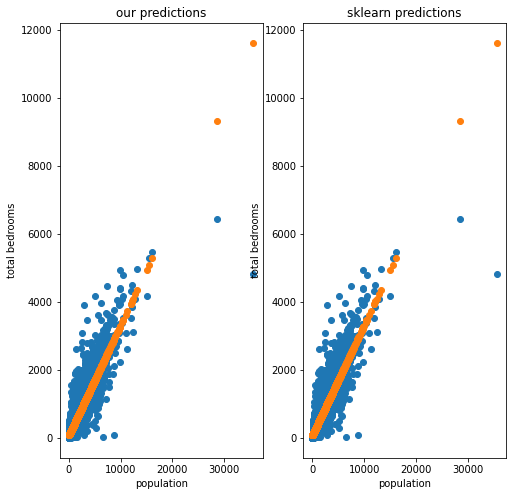

In [38]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(population,bedrooms)
ax1.scatter(population, get_predictions(best_model,population_np))
ax2.scatter(population,bedrooms)
ax2.scatter(population, sklearn_predictions)
ax1.set_title('our predictions')
ax1.set_xlabel('population')
ax1.set_ylabel('total bedrooms')

ax2.set_title('sklearn predictions')
ax2.set_xlabel('population')
ax2.set_ylabel('total bedrooms')
plt.show()


**It's safe to assume that scikit learn uses the same implementation as this since the values are the same visually but to be sure let's check the numerical values in the dataFrame**

In [39]:
predictions_df['our_model_predictions'] = get_predictions(best_model,population_np)
predictions_df

,Population,Bedrooms,sklearn_predictions,our_model_predictions
0,1015.0,1283.0,405.266668,405.266668
1,1129.0,1901.0,442.153776,442.153776
2,333.0,174.0,184.591162,184.591162
3,515.0,337.0,243.481106,243.481106
4,624.0,326.0,278.750359,278.750359
...,...,...,...,...
16995,907.0,394.0,370.320987,370.320987
16996,1194.0,528.0,463.185899,463.185899
16997,1244.0,531.0,479.364455,479.364455
16998,1298.0,552.0,496.837296,496.837296


**we can see the values are the same, and we have succesfully replicated the simplest linear regressor that scikit learn uses.**